In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
matplotlib.rcParams.update({'font.size': 20})
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc


In [2]:
df = pd.read_csv("E:\e-sports\e-sports_Submission_1\e-sports_Submission_1\Multi_LeadercallOfDutyMetricsbattle.csv",na_values = '0')
df.head()

,xp,score,timePlayed,gamesPlayed,losses,kills,deaths,assists,headshots,hits,misses,shots,accuracy,kdRatio,level,prestige,scorePerMinute,wins
0,439313,408.0,437,NaN,4.0,455.0,990,160.0,84.0,26.0,109.0,135.0,NaN,0.459596,36,110.0,0.560183,21.0
1,4192203,324849.0,2109,337.0,11.0,16220.0,17291,3546.0,3499.0,43075.0,163545.0,206620.0,55.0,0.938060,183,110.0,92.417923,348.0
2,186507,NaN,134,NaN,3.0,311.0,322,60.0,72.0,NaN,NaN,NaN,NaN,0.965839,22,110.0,NaN,9.0
3,255260,36489.0,106,50.0,7.0,1534.0,1487,396.0,207.0,6800.0,30365.0,37165.0,55.0,1.031607,27,5.0,206.541509,49.0
4,10395,NaN,13,NaN,NaN,11.0,24,NaN,3.0,NaN,NaN,NaN,NaN,0.458333,3,110.0,NaN,NaN


In [3]:
df.describe()

,xp,score,timePlayed,gamesPlayed,losses,kills,deaths,assists,headshots,hits,misses,shots,accuracy,kdRatio,level,prestige,scorePerMinute,wins
count,6.082000e+03,4.940000e+03,6082.000000,4823.000000,5201.000000,6077.000000,6082.000000,5591.000000,5991.000000,4920.000000,4.929000e+03,4.929000e+03,4626.000000,6077.000000,6082.000000,5113.000000,4940.000000,5189.000000
mean,1.295521e+06,2.052550e+05,631.740710,219.329048,8.373197,5692.525917,5774.828017,1117.174566,964.926390,18918.452033,8.327957e+04,1.021631e+05,54.425638,0.823344,64.914666,83.327401,168.307023,259.263056
std,2.158772e+06,3.101811e+05,899.107774,338.773808,8.425358,10172.766381,9806.566170,1896.788914,1702.072265,29667.816093,1.297537e+05,1.584875e+05,1.382745,0.397735,76.648261,42.750001,101.561127,364.766794
min,3.000000e+02,1.100000e+01,10.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000e+00,50.000000,0.028571,1.000000,1.000000,0.048903,1.000000
25%,5.825875e+04,1.431850e+04,49.000000,15.000000,4.000000,162.000000,243.250000,57.000000,31.000000,1027.000000,5.174000e+03,6.199000e+03,54.000000,0.631196,11.000000,40.000000,76.582522,23.000000
50%,3.467095e+05,7.511100e+04,231.000000,81.000000,7.000000,1246.000000,1520.000000,330.000000,235.000000,6369.500000,2.891300e+04,3.563000e+04,54.000000,0.867500,32.000000,110.000000,181.443065,107.000000
75%,1.544910e+06,2.673020e+05,857.000000,280.000000,11.000000,6731.000000,6996.000000,1373.000000,1169.500000,24581.000000,1.101630e+05,1.349580e+05,55.000000,0.996044,101.000000,111.000000,254.467310,351.000000
max,3.133592e+07,3.388660e+06,8162.000000,5763.000000,252.000000,114523.000000,113049.000000,31459.000000,25703.000000,371873.000000,1.867686e+06,2.201557e+06,62.000000,11.857143,816.000000,117.000000,519.685714,4276.000000


In [13]:
# from numpy import nan
# missing_values = df.replace(0,nan)

In [4]:
 col_miss = df.columns[df.isna().any()]
df[col_miss].isna().sum()

score             1142
gamesPlayed       1259
losses             881
kills                5
assists            491
headshots           91
hits              1162
misses            1153
shots             1153
accuracy          1456
kdRatio              5
prestige           969
scorePerMinute    1142
wins               893
dtype: int64

<AxesSubplot:>

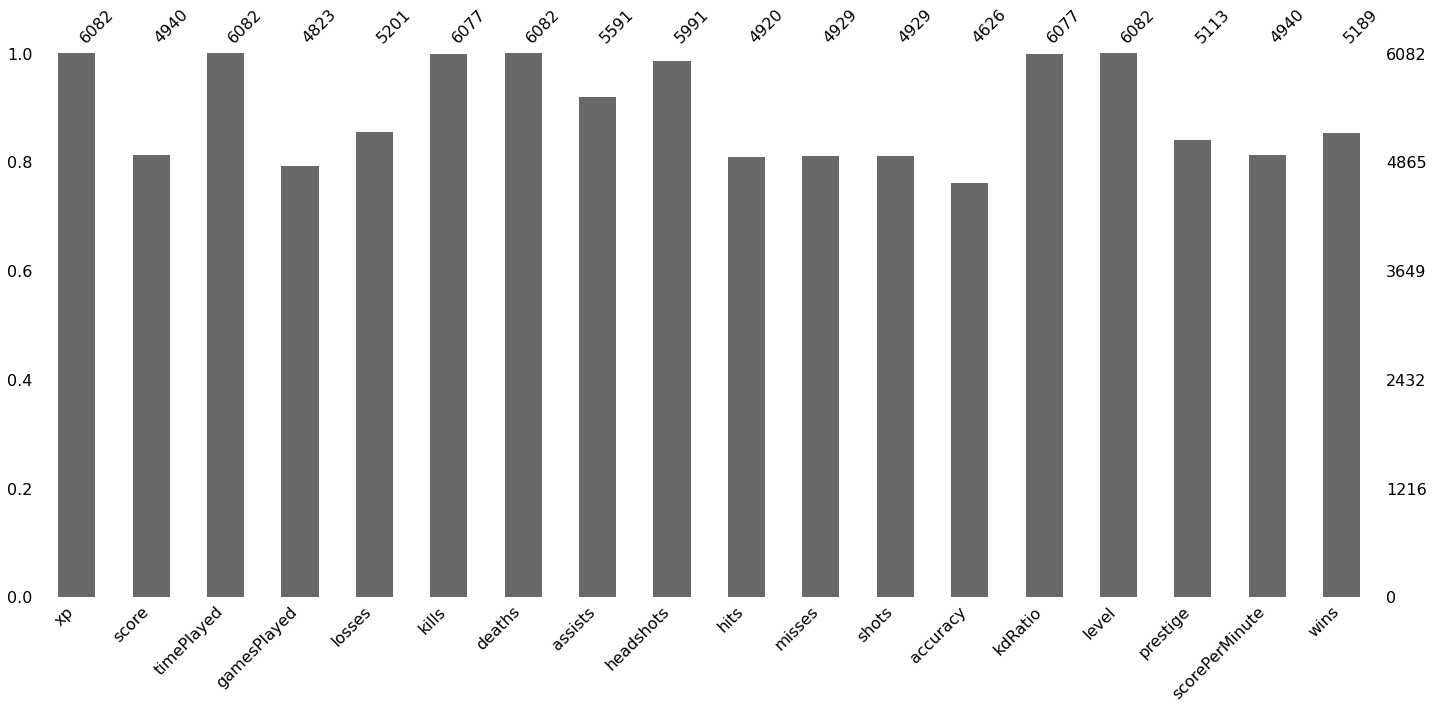

In [5]:
import missingno as msno
msno.bar(df)

In [7]:
corr = df.corr()
corr.head()

,xp,score,timePlayed,gamesPlayed,losses,kills,deaths,assists,headshots,hits,misses,shots,accuracy,kdRatio,level,prestige,scorePerMinute,wins
xp,1.000000,0.720573,0.929481,0.726785,0.431575,0.866077,0.839747,0.796852,0.868454,0.755138,0.747342,0.753144,0.116983,0.309454,0.969785,0.228235,-0.076216,0.789985
score,0.720573,1.000000,0.832981,0.973343,0.470879,0.922002,0.935426,0.867437,0.880528,0.906554,0.920385,0.923150,0.102114,0.266400,0.738699,0.155230,0.290766,0.929605
timePlayed,0.929481,0.832981,1.000000,0.826139,0.455945,0.865235,0.872975,0.796255,0.851721,0.781093,0.791492,0.794125,0.073934,0.267535,0.940685,0.248700,-0.049425,0.910631
gamesPlayed,0.726785,0.973343,0.826139,1.000000,0.528458,0.923732,0.920910,0.879990,0.886408,0.910662,0.911710,0.916860,0.125848,0.278215,0.738142,0.157695,0.236891,0.898430
losses,0.431575,0.470879,0.455945,0.528458,1.000000,0.477956,0.452434,0.487845,0.477045,0.471448,0.460005,0.464865,0.194483,0.229086,0.460972,0.028448,0.171400,0.413653


In [24]:
# #View Distributions of each feature through histogram
# # 
# import seaborn as sns
# sns.pairplot(df, hue="kdRatio", diag_kind="hist")
# plt.show()


<AxesSubplot:>

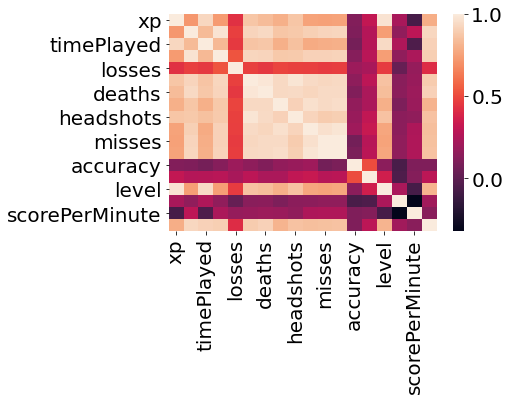

In [8]:
import seaborn as sns
sns.heatmap(corr)

In [9]:
# Knn imputation on missing values
import numpy as np
from sklearn.impute import KNNImputer

nan = np.nan
imputer = KNNImputer(n_neighbors=2, weights="uniform",metric='nan_euclidean')
imputed = imputer.fit_transform(df)


In [10]:
predf= pd.DataFrame(imputed, columns = df.columns)
predf.head()

,xp,score,timePlayed,gamesPlayed,losses,kills,deaths,assists,headshots,hits,misses,shots,accuracy,kdRatio,level,prestige,scorePerMinute,wins
0,439313.0,408.0,437.0,5.5,4.0,455.0,990.0,160.0,84.0,26.0,109.0,135.0,53.0,0.459596,36.0,110.0,0.560183,21.0
1,4192203.0,324849.0,2109.0,337.0,11.0,16220.0,17291.0,3546.0,3499.0,43075.0,163545.0,206620.0,55.0,0.938060,183.0,110.0,92.417923,348.0
2,186507.0,12533.5,134.0,17.5,3.0,311.0,322.0,60.0,72.0,1077.0,2525.0,3602.0,57.5,0.965839,22.0,110.0,59.205516,9.0
3,255260.0,36489.0,106.0,50.0,7.0,1534.0,1487.0,396.0,207.0,6800.0,30365.0,37165.0,55.0,1.031607,27.0,5.0,206.541509,49.0
4,10395.0,3412.5,13.0,2.5,2.0,11.0,24.0,4.5,3.0,215.0,938.0,1082.0,53.0,0.458333,3.0,110.0,107.763158,13.0


In [11]:
# Missing value of x_train data
from numpy import isnan
predf = imputer.transform(predf)
print('Missing: %d' % sum(isnan(predf).flatten()))

Missing: 0


In [12]:
#spliting the data into trai and test data 
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=6082)

In [13]:
x.shape

(6082, 2)

In [14]:
y.shape

(6082,)

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
print(pd.DataFrame(x_train))


             0         1
0     7.224421 -4.416850
1    -9.503233  0.080410
2    -3.978999  6.161886
3    -6.013266  5.544829
4    -5.256608  5.796612
...        ...       ...
4860 -8.214790 -0.104076
4861 -9.058924 -0.144670
4862  4.439489 -3.740024
4863  7.866968 -3.767501
4864 -8.424470  1.414939

[4865 rows x 2 columns]


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))
def optimize_k(df, target):
    errors = []
    for k in range(1, 20, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(df)
        df_imputed = pd.DataFrame(imputed, columns=df.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

In [17]:
k_errors = optimize_k(df, target= 'kdRatio')

In [18]:
k_errors

[{'K': 1, 'RMSE': 0.12214391119950736},
 {'K': 3, 'RMSE': 0.10955520556961149},
 {'K': 5, 'RMSE': 0.11669295995147734},
 {'K': 7, 'RMSE': 0.11191937279911489},
 {'K': 9, 'RMSE': 0.11937733396833079},
 {'K': 11, 'RMSE': 0.11624969231640495},
 {'K': 13, 'RMSE': 0.11679008010891313},
 {'K': 15, 'RMSE': 0.1187689882726849},
 {'K': 17, 'RMSE': 0.11704269828677068},
 {'K': 19, 'RMSE': 0.11629225473732073}]

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(predf)
print(pd.DataFrame(scaled, columns = df.columns))

            xp     score  timePlayed  gamesPlayed    losses     kills  \
0    -0.396651 -0.578439   -0.216611    -0.541983 -0.424757 -0.514586   
1     1.341930  0.540158    1.643163     0.514811  0.437127  1.035706   
2    -0.513767 -0.536633   -0.553640    -0.503728 -0.547883 -0.528746   
3    -0.481916 -0.454040   -0.584784    -0.400121 -0.055378 -0.408479   
4    -0.595353 -0.568080   -0.688228    -0.551547 -0.671010 -0.558248   
...        ...       ...         ...          ...       ...       ...   
6077  0.101783  0.351551    0.083711     0.272529  0.560253  0.356193   
6078 -0.038478  0.785270    0.214963     0.594509  0.190874  0.156667   
6079 -0.400639 -0.240865   -0.377895    -0.208846  0.683379 -0.308569   
6080  0.047422 -0.462560    0.295049    -0.470255 -0.301631 -0.315550   
6081 -0.575127 -0.503433   -0.644849    -0.483007 -0.301631 -0.512717   

        deaths   assists  headshots      hits    misses     shots  accuracy  \
0    -0.487961 -0.471422  -0.511774 -0.55684

In [11]:
# x = predf.iloc[:, :-1].values
# print(X)

In [10]:
# y = predf.iloc[:,:-1].values
# print(y)

In [21]:
x_train.shape

(4865, 2)

In [22]:
x_test.shape

(1217, 2)

In [23]:
x_train

array([[ 7.22442106, -4.41684997],
       [-9.5032327 ,  0.08041019],
       [-3.97899877,  6.16188626],
       ...,
       [ 4.43948901, -3.74002359],
       [ 7.86696767, -3.76750103],
       [-8.42447038,  1.4149387 ]])

In [24]:
y_train

array([2, 1, 0, ..., 2, 2, 1])

In [25]:
x_test

array([[ 6.55160869, -3.80882916],
       [-8.95474842,  0.54209506],
       [ 6.16103082, -4.93871509],
       ...,
       [-3.8309897 ,  5.70355674],
       [ 6.79413707, -5.2356497 ],
       [-7.75332207,  0.63468489]])

In [26]:
y_test

array([2, 1, 2, ..., 0, 2, 1])

In [27]:
np.any(np.isnan(predf))

False

In [28]:
np.all(np.isfinite(predf))

True

In [29]:
predf.shape

(6082, 18)

In [30]:
# train using neural networks
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [32]:
#fit decision tree classifier
model_nn = MLPClassifier(random_state = 1, max_iter=300)
# y_train = predf.astype('int')
model_nn.fit(x_train, y_train)


#predict 'y' for test data
y_data_pred_test = model_nn.predict(x_test)

#score
print('Accuracy: ', accuracy_score(y_test, y_data_pred_test))
print('confusion matrix:', confusion_matrix(y_test, y_data_pred_test))
print('F1:Average score:', f1_score(y_test, y_data_pred_test,average ='weighted'))
print('F1:Macro score:', f1_score(y_test, y_data_pred_test,average ='macro'))
print('F1:Micro score:', f1_score(y_test, y_data_pred_test,average ='micro'))

Accuracy:  1.0
confusion matrix: [[407   0   0]
 [  0 391   0]
 [  0   0 419]]
F1:Average score: 1.0
F1:Macro score: 1.0
F1:Micro score: 1.0


In [33]:
# mean of dataset


df1 = predf.mean(axis = 0)
df1

array([1.29552111e+06, 1.68180128e+05, 6.31740710e+02, 1.75511756e+02,
       7.44976981e+00, 5.68784980e+03, 5.77482802e+03, 1.02873997e+03,
       9.50528198e+02, 1.54195047e+04, 6.80417436e+04, 8.34573270e+04,
       5.42282966e+01, 8.22776847e-01, 6.49146662e+01, 8.50295133e+01,
       1.53612107e+02, 2.24557054e+02])

In [34]:
# Covariance matrom 
mean_vec = np.mean(scaled, axis=0)
cov_mat = (scaled - mean_vec).T.dot((scaled-mean_vec)) / (scaled.shape[0]-1)

c_mat = pd.DataFrame(cov_mat,columns = df.columns)
print("Covariancematrix \n%s" %c_mat)

Covariancematrix 
          xp     score  timePlayed  gamesPlayed    losses     kills    deaths  \
0   1.000164  0.739934    0.929634     0.745829  0.468275  0.866256  0.839885   
1   0.739934  1.000164    0.844968     0.975535  0.518566  0.927506  0.940123   
2   0.929634  0.844968    1.000164     0.837222  0.496091  0.865414  0.873119   
3   0.745829  0.975535    0.837222     1.000164  0.569189  0.929540  0.926980   
4   0.468275  0.518566    0.496091     0.569189  1.000164  0.509583  0.487485   
5   0.866256  0.927506    0.865414     0.929540  0.509583  1.000164  0.979825   
6   0.839885  0.940123    0.873119     0.926980  0.487485  0.979825  1.000164   
7   0.802548  0.876867    0.802335     0.889216  0.522429  0.936674  0.935215   
8   0.869256  0.889031    0.852623     0.895079  0.509364  0.976453  0.943508   
9   0.771793  0.913233    0.796671     0.917807  0.517498  0.943161  0.929697   
10  0.764563  0.926084    0.806376     0.918779  0.507287  0.933062  0.942692   
11  0.7700

In [35]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = 18) #we have 18 features

In [36]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=3)
x_pca = pca_breast.fit_transform(scaled)

In [37]:
pca_Df = pd.DataFrame(data = x_pca
             , columns = ['principal component 1', 'principal component 2','principal component3'])

In [38]:
pca_Df.head()

,principal component 1,principal component 2,principal component3
0,-2.034835,-1.771619,0.048459
1,3.784715,-0.917218,1.086952
2,-1.854281,0.483038,1.888970
3,-1.428800,1.956865,-0.106252
4,-2.356790,-1.083006,-0.621986


In [39]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.67319295 0.08835866 0.06862996]


In [40]:
x_pca.shape

(6082, 3)

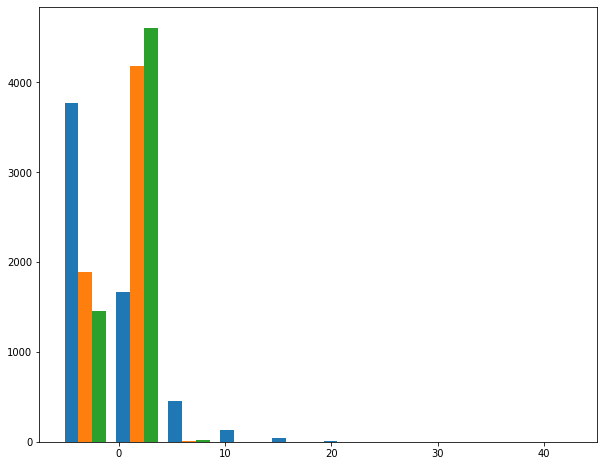

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[10,8])
x = x_pca[:,0]
y = x_pca[:,1]
z = x_pca[:,2]
n, bins, patches = plt.hist([x, y,z])

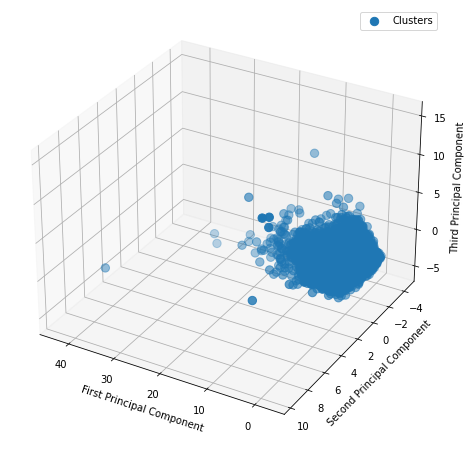

In [42]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], s=70)
ax.legend(['Clusters'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(30, 120)

In [43]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    plt.figure(figsize=(15,10))
    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

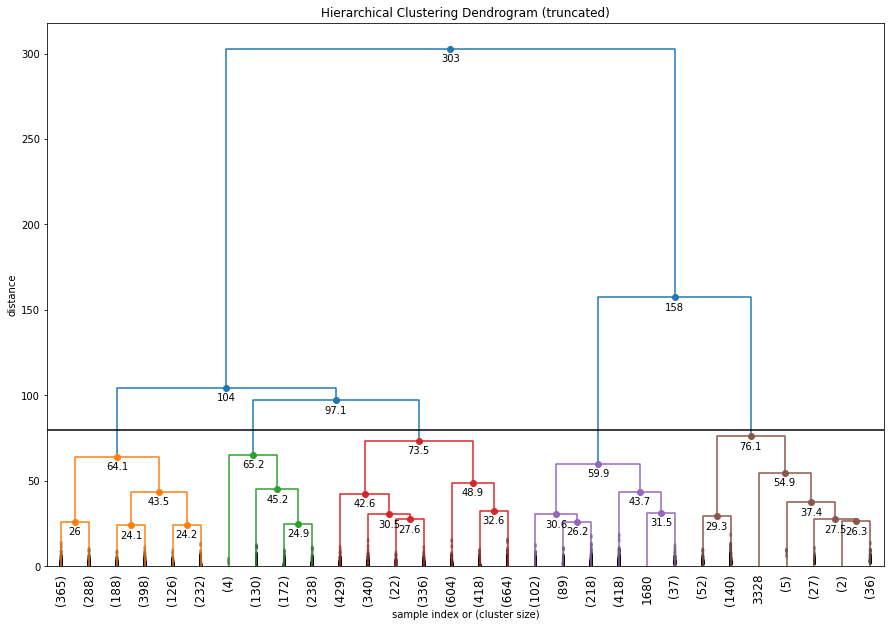

In [47]:
from scipy.cluster.hierarchy import dendrogram, ward

linked_array = ward(scaled)

fancy_dendrogram(
    linked_array,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=80
)

plt.show()


In [48]:
print('distances for the last 5 merges:\n{}'.format(linked_array[-5:,2]))

distances for the last 5 merges:
[ 76.07084688  97.1266629  104.3613527  157.50193199 302.8225674 ]


In [49]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(predf)
labels = cluster.labels_
print(labels)

[0 2 0 ... 0 0 0]


In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
# generate the linkage matrix
Z = linkage(predf, 'ward')

you can and should definitely do is check the Cophenetic Correlation Coefficient of your clustering with help of the cophenet() function. This (very very briefly) compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances, which in our case is pretty close:

In [51]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(predf))
c

0.8643320157924232

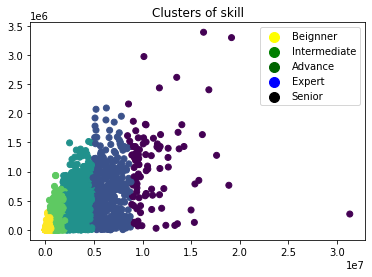

In [52]:
# #Visualizing the clusters using scatter plots
plt.scatter(predf[:,0],predf[:,1],  
           c = AgglomerativeClustering(n_clusters = 5).fit_predict(predf), cmap =plt.cm.viridis) 
plt.scatter(predf[cluster == 0, 0], predf[cluster  == 0, 1], s = 100, c = 'yellow', label = 'Beignner')
plt.scatter(predf[cluster  == 1, 0], predf[cluster  == 1, 1], s = 100, c = 'green', label = 'Intermediate')
plt.scatter(predf[cluster  == 2, 0], predf[cluster  == 2, 1], s = 100, c = 'darkgreen', label = 'Advance')
plt.scatter(predf[cluster  == 3, 0], predf[cluster  == 3, 1], s = 100, c = 'blue', label = 'Expert')
plt.scatter(predf[cluster  == 4, 0], predf[cluster  == 4, 1], s = 100, c = 'black', label = 'Senior')
plt.title('Clusters of skill')
# plt.xlabel('players')
# plt.ylabel('accuracy')
plt.legend()
plt.show()